In [1]:
import numpy as np
import matplotlib.pyplot as plt
from exp_generate_data import exp_formalism_data_generator
from exp_hh_model import HH_model_exp

In [2]:
params_bounds = {'p': (1, 4), 
                 'g_max': (100, 140), 
                 'E_rev': (-100, -60), 
                 'a_m': (0, 100), 
                 'b_m': (0, 100), 
                 'delta_m': (0, 1), 
                 's_m': (-100, 0)}

sim_setup = {'prestep_V': -100, 'step_Vs': np.linspace(0, 100, 11), 't': np.arange(0.0, 6.0, 0.01)}

In [3]:
data_generator = exp_formalism_data_generator(params_bounds, sim_setup)

In [4]:
data_generator.generate_data(10)

/Users/maxwellyue/Documents/GitHub/Compute-Canada-Research/Exponential Rates/exp_hh_model.py:85: RuntimeWarning: divide by zero encountered in divide
  diff_arr = np.abs((self.current_traces[i, :][1:] - self.current_traces[i, :][:-1]) / (self.current_traces[i, :][:-1] - self.current_traces[i, :][0]))
/Users/maxwellyue/Documents/GitHub/Compute-Canada-Research/Exponential Rates/exp_hh_model.py:31: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((V - self.V_2m) / self.s_m))
/Users/maxwellyue/Documents/GitHub/Compute-Canada-Research/Exponential Rates/exp_hh_model.py:61: RuntimeWarning: divide by zero encountered in divide
  return self.m_infty(V) + (self.m_infty(self.prestep_V) - self.m_infty(V)) * np.exp(- self.t / self.tau_m(V))
/Users/maxwellyue/Documents/GitHub/Compute-Canada-Research/Exponential Rates/exp_hh_model.py:61: RuntimeWarning: invalid value encountered in divide
  return self.m_infty(V) + (self.m_infty(self.prestep_V) - self.m_infty(V)) * np.exp(- self.t

(10, 447)

#### test

In [6]:
data_generator.dataset[:, -7:]

array([[ 3.00000000e+00,  1.00497975e+02, -8.35177078e+01,
         1.03108425e+00,  3.88100684e+01,  3.73604003e-01,
        -1.10877175e+01],
       [ 3.00000000e+00,  1.16012722e+02, -6.53925962e+01,
         4.89907115e-01,  4.83631218e+01,  5.53622514e-01,
        -1.25533851e+01],
       [ 2.00000000e+00,  1.39042015e+02, -6.34213029e+01,
         1.18839954e+00,  4.00981543e+01,  4.00608865e-01,
        -1.25784163e+01],
       [ 3.00000000e+00,  1.38532349e+02, -7.57221826e+01,
         4.08781508e-01,  8.49801722e+00,  4.71047111e-01,
        -1.41323060e+01],
       [ 3.00000000e+00,  1.16413891e+02, -6.54254751e+01,
         1.27326806e+00,  2.90008103e+01,  1.30878622e-01,
        -1.18294174e+01],
       [ 1.00000000e+00,  1.04257556e+02, -8.37596662e+01,
         1.64799082e-01,  9.52574240e+00,  4.54091001e-01,
        -1.41208311e+01],
       [ 2.00000000e+00,  1.08863217e+02, -9.45674028e+01,
         7.47924032e-01,  2.96837554e+01,  1.60654751e-01,
        -1.0949932

In [7]:
sample = 5

list = data_generator.dataset[sample, -7:]
params = {'p': list[0], 'g_max': list[1], 'E_rev': list[2], 'a_m': list[3], 'b_m': list[4], 'delta_m': list[5], 's_m': list[6]}

In [8]:
plot_range = range(int(sim_setup['step_Vs'][0]), int(sim_setup['step_Vs'][-1]))
model = HH_model_exp(params, sim_setup)


57.288580345395495


Text(0.5, 1.0, 'Activation Steady State Curve')

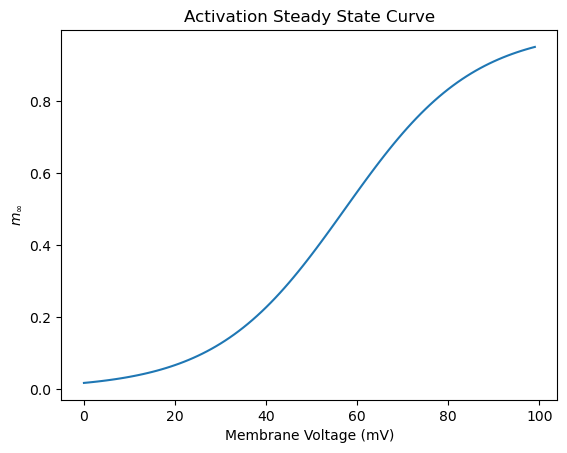

In [9]:
# get steady state curve/activation curve
print(model.V_2m)

m_infty_curve = np.array([model.m_infty(V) for V in plot_range])

plt.plot(plot_range, m_infty_curve)

plt.xlabel('Membrane Voltage (mV)')
plt.ylabel('$m_\infty$')
plt.title('Activation Steady State Curve')


#### other plots

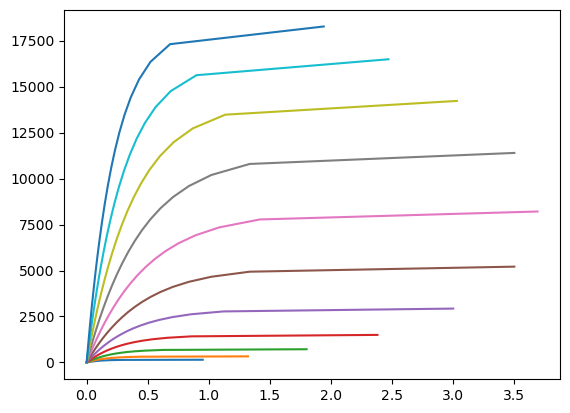

In [29]:
time_traces = data_generator.dataset[sample, :220].reshape(11, -1)
current_traces = data_generator.dataset[sample,220 :440].reshape(11, -1)

for trace in range(time_traces.shape[0]): 
    plt.plot(time_traces[trace], current_traces[trace])

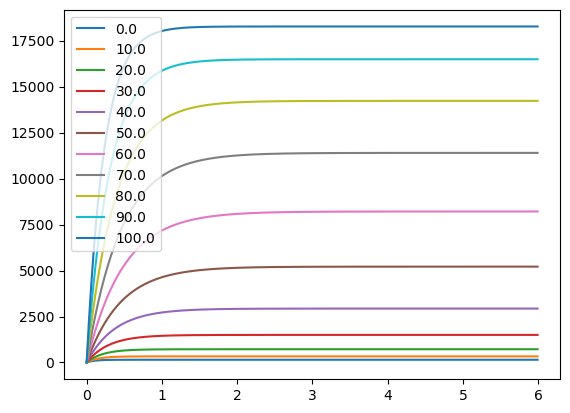

In [24]:
current_traces = model.simulation()
current_traces.shape
step_Vs = sim_setup['step_Vs']

for step in range(len(step_Vs)): 
    plt.plot(sim_setup['t'], current_traces[step], label = f'{step_Vs[step]}')
    
# plt.xlim(0, 0.4)
plt.legend()

Text(0.5, 1.0, 'Activation Time Constant Curve')

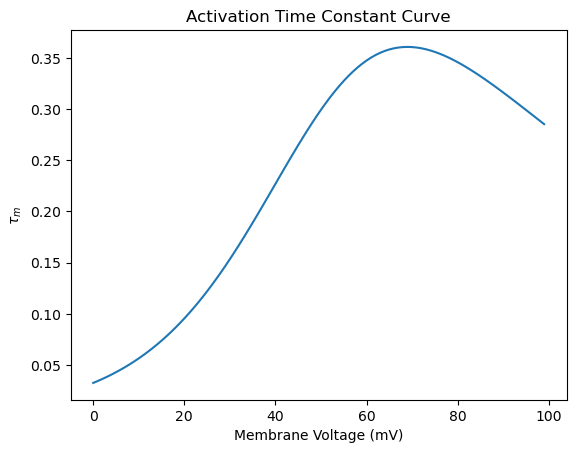

In [45]:
# get the time constant curve
time_constant_curve = np.array([model.tau_m(V) for V in plot_range]) / (0.63)

plt.plot(plot_range, time_constant_curve)

plt.xlabel('Membrane Voltage (mV)')
plt.ylabel('$\u03C4_m$')
plt.title('Activation Time Constant Curve')

Text(0.5, 1.0, 'Opening and Closing Rate Curves')

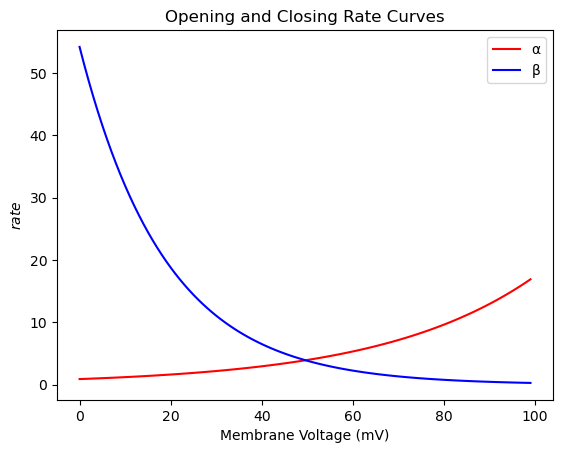

In [29]:
opening_rates = np.array([model.alpha(V) for V in plot_range]) 
closing_rates = np.array([model.beta(V) for V in plot_range]) 

plt.plot(plot_range, opening_rates, color='red', label = '\u03B1')
plt.plot(plot_range, closing_rates, color='blue', label = '\u03B2')

plt.xlabel('Membrane Voltage (mV)')
plt.ylabel('$rate$')
plt.legend()
plt.title('Opening and Closing Rate Curves')

#### Save file test

In [14]:
import os

In [20]:
if os.path.isfile("dataset_exp.csv"):
    # file exists
    data_generator.save_tubular_data()
else:
    data_generator.create_empty_csv()

In [2]:
import numpy as np
np.linspace(-20, 100, 13)

array([-20., -10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,
        90., 100.])